<a href="https://colab.research.google.com/github/Akansha3001/AI-ML-Month/blob/main/You_tube_comments_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### You Tube Comments Sentiment Analysis

Import modules

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
!pip install textblob
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df1=pd.read_csv("/content/GBcomments - GBcomments.csv.csv")
df2=pd.read_csv("/content/UScomments - UScomments.csv.csv")

<ipython-input-2-3315687cfe81>:1: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("/content/GBcomments - GBcomments.csv.csv")
<ipython-input-2-3315687cfe81>:2: DtypeWarning: Columns (2,3,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("/content/UScomments - UScomments.csv.csv")


In [ ]:
print(df1.shape)

(718457, 7)


In [ ]:
print(df2.shape)

(691407, 11)


In [ ]:
print(df1.head(10))

      video_id                                       comment_text likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...     0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂     1   
2  jt2OHQh0HoQ  Thank gosh. a place I can watch it without hav...     0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...     0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...     0   
5  jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...     0   
6  jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!     0   
7  jt2OHQh0HoQ  You will never find Losers who line up and pay...     0   
8  jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...     0   
9  jt2OHQh0HoQ  I'm only here to see Emma. I love her so much!...     0   

  replies Unnamed: 4  Unnamed: 5  Unnamed: 6  
0       0        NaN         NaN         NaN  
1       0        NaN         NaN         NaN  
2       0        NaN         NaN 

In [ ]:
print(df1.columns)

Index(['video_id', 'comment_text', 'likes', 'replies', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')


In [ ]:
df1 = df1.drop(columns=['Unnamed: 4','Unnamed: 5', 'Unnamed: 6'])

In [ ]:
print(df1.columns)

Index(['video_id', 'comment_text', 'likes', 'replies'], dtype='object')


In [ ]:
print(df2.head(10))

      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies Unnamed: 4 Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0       0        NaN        NaN         NaN         NaN         NaN   
1       0        NaN        NaN 

In [ ]:
print(df2.columns)

Index(['video_id', 'comment_text', 'likes', 'replies', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')


In [ ]:
df2=df2.drop(columns=['Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9','Unnamed: 10'])

In [ ]:
print(df2.columns)

Index(['video_id', 'comment_text', 'likes', 'replies'], dtype='object')


In [ ]:
merged_df_comments = pd.concat([df1, df2], ignore_index=True)

In [ ]:
print(merged_df_comments.head(10))

      video_id                                       comment_text likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...     0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂     1   
2  jt2OHQh0HoQ  Thank gosh. a place I can watch it without hav...     0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...     0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...     0   
5  jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...     0   
6  jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!     0   
7  jt2OHQh0HoQ  You will never find Losers who line up and pay...     0   
8  jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...     0   
9  jt2OHQh0HoQ  I'm only here to see Emma. I love her so much!...     0   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0  


In [ ]:
print(merged_df_comments.shape)

(1409864, 4)


In [ ]:
df3=pd.read_csv("/content/GBvideos.csv", encoding='latin1')
df4=pd.read_csv("/content/USvideos.csv", encoding='latin1')

In [ ]:
print(df3.head(10))

      video_id                                              title  \
0  jt2OHQh0HoQ  Live Apple Event - Apple September Event 2017 ...   
1  AqokkXoa7uE  Holly and Phillip Meet Samantha the Sex Robot ...   
2  YPVcg45W0z4                    My DNA Test Results! I'm WHAT?!   
3  T_PuZBdT2iM  getting into a conversation in a language you ...   
4  NsjsmgmbCfc                               Baby Name Challenge!   
5  zZ2CLmvqfXg  REVEALED - FIFA 18 stats for Chelsea's Hazard,...   
6  w8fAellnPns  Juicy Chicken Breast - You Suck at Cooking (ep...   
7  LcZ2AuvxXNA                Nerf Bow Trick Shots | Dude Perfect   
8  lamseWekh8Y     Weekend in BRIGHTON with Mike! | Fleur De Vlog   
9  QBGaO89cBMI                                   Radiohead - Lift   

                 channel_title  category_id  \
0                  Apple Event           28   
1                 This Morning           24   
2                 emmablackery           24   
3                        ProZD            1   
4    

In [ ]:
print(df3.columns)

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19'],
      dtype='object')


In [ ]:
df3=df3.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19'])

In [ ]:
print(df3.columns)

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')


In [ ]:
print(df3.shape)

(7997, 11)


In [ ]:
print(df4.head(10))

      video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X  Introducing iPhone X  Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   
5  cMKX2tE5Luk    The Disaster Artist | Official Trailer HD | A24   
6  8wNr-NQImFg       The Check In: HUD, Ben Carson and Hurricanes   
7  _HTXMhKWqnA                   iPhone X Impressions & Hands On!   
8  _ANP3HR1jsM                         ATTACKED BY A POLICE DOG!!   
9  zgLtEob6X-Q                 Honest Trailers - The Mummy (2017)   

                 channel_title  category_id  \
0             Logan Paul Vlogs           24   
1                        Apple           28   
2                    PewDiePie           22   
3                    The Verge           28   
4    

In [ ]:
print(df4.columns)

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19'],
      dtype='object')


In [ ]:
df4=df4.drop(columns=[ 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14','Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19'])

In [ ]:
print(df4.columns)

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')


In [ ]:
print(df4.shape)

(8000, 11)


In [ ]:
merged_df_videos = pd.concat([df3, df4], ignore_index=True)

In [ ]:
print(merged_df_videos.head(10))

      video_id                                              title  \
0  jt2OHQh0HoQ  Live Apple Event - Apple September Event 2017 ...   
1  AqokkXoa7uE  Holly and Phillip Meet Samantha the Sex Robot ...   
2  YPVcg45W0z4                    My DNA Test Results! I'm WHAT?!   
3  T_PuZBdT2iM  getting into a conversation in a language you ...   
4  NsjsmgmbCfc                               Baby Name Challenge!   
5  zZ2CLmvqfXg  REVEALED - FIFA 18 stats for Chelsea's Hazard,...   
6  w8fAellnPns  Juicy Chicken Breast - You Suck at Cooking (ep...   
7  LcZ2AuvxXNA                Nerf Bow Trick Shots | Dude Perfect   
8  lamseWekh8Y     Weekend in BRIGHTON with Mike! | Fleur De Vlog   
9  QBGaO89cBMI                                   Radiohead - Lift   

                 channel_title  category_id  \
0                  Apple Event           28   
1                 This Morning           24   
2                 emmablackery           24   
3                        ProZD            1   
4    

In [ ]:
print(merged_df_comments.isnull().sum())

video_id         0
comment_text    63
likes            0
replies          0
dtype: int64


In [ ]:
# Filter the DataFrame to show rows with missing values in the specified columns
missing_values = merged_df_comments[merged_df_comments['comment_text'].isnull() |
                                    merged_df_comments['likes'].isnull() |
                                    merged_df_comments['replies'].isnull()]

# Display the rows with missing values
print(missing_values)

            video_id comment_text likes replies
9475     y33oo6YsUoI          NaN     0       0
16713    NPovS8i2WDo          NaN     0       0
30021    y33oo6YsUoI          NaN     0       0
32364    2FTxKFsWz60          NaN     0       0
45280    xKXxJcf6_IE          NaN     0       0
...              ...          ...   ...     ...
1323503  CX4KuIBmnjI          NaN     0       0
1334089  5qlSfNVp3fU          NaN     0       0
1346905  XPqko6Q0lpE          NaN     0       0
1355746  5qlSfNVp3fU          NaN     0       0
1367792  XPqko6Q0lpE          NaN     0       0

[63 rows x 4 columns]


In [ ]:
merged_df_comments = merged_df_comments.dropna()

In [ ]:
print(merged_df_videos.isnull().sum())

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64


In [ ]:
merged_df_comments = merged_df_comments.drop_duplicates()
merged_df_videos = merged_df_videos.drop_duplicates()

In [ ]:
column_data_types = merged_df_comments.dtypes
print(column_data_types)

video_id        object
comment_text    object
likes           object
replies         object
dtype: object


In [ ]:
# Convert 'likes' column to integer data type, replacing invalid values with NaN
merged_df_comments['likes'] = pd.to_numeric(merged_df_comments['likes'], errors='coerce')

# Convert 'replies' column to integer data type, replacing invalid values with NaN
merged_df_comments['replies'] = pd.to_numeric(merged_df_comments['replies'], errors='coerce')

In [ ]:
column_data_types2 = merged_df_videos.dtypes
print(column_data_types2)

video_id           object
title              object
channel_title      object
category_id         int64
tags               object
views               int64
likes               int64
dislikes            int64
comment_total       int64
thumbnail_link     object
date              float64
dtype: object


In [ ]:
# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define preprocessing function
def preprocess_text(text):
    #Convert into lower case
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters and punctuation except emojis
    text = re.sub(r'[^\w\s\ufe0f-]+', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    text = ' '.join([word for word in tokens if word not in stop_words])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in tokens])

    return text

# Apply text preprocessing to the 'comment_text' column in the comments dataset
merged_df_comments['comment_text'] = merged_df_comments['comment_text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#Distribution of Sentiment Labels:
def assign_sentiment_textblob(comment):
    blob = TextBlob(comment)
    polarity = blob.sentiment.polarity

    # Determine sentiment label based on polarity score
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'
merged_df_comments['sentiment'] = merged_df_comments['comment_text'].apply(assign_sentiment_textblob)


In [ ]:
merged_df_comments['sentiment'] = merged_df_comments['comment_text'].apply(assign_sentiment_textblob)
print(merged_df_comments.head(25))

       video_id                                       comment_text  likes  \
0   jt2OHQh0HoQ       accurate call 1000 price closer calling x 10    0.0   
1   jt2OHQh0HoQ                                     samsung phonen    1.0   
2   jt2OHQh0HoQ  thank gosh place watch without hd speed doesnt...    0.0   
3   jt2OHQh0HoQ  happened home button iphone x coughcopying sam...    0.0   
4   jt2OHQh0HoQ  power disease care cure keep caring others bes...    0.0   
5   jt2OHQh0HoQ  keep calm buy iphone 8 keep calm buy iphone 8 ...    0.0   
6   jt2OHQh0HoQ                                  big fan youtube u    0.0   
7   jt2OHQh0HoQ  never find loser line pay good money crap line...    0.0   
8   jt2OHQh0HoQ            apple commented last video im cry right    0.0   
9   jt2OHQh0HoQ                     im see emma love much im proud    0.0   
10  jt2OHQh0HoQ                             mom said one video bed    0.0   
11  jt2OHQh0HoQ                                          song 3920    0.0   

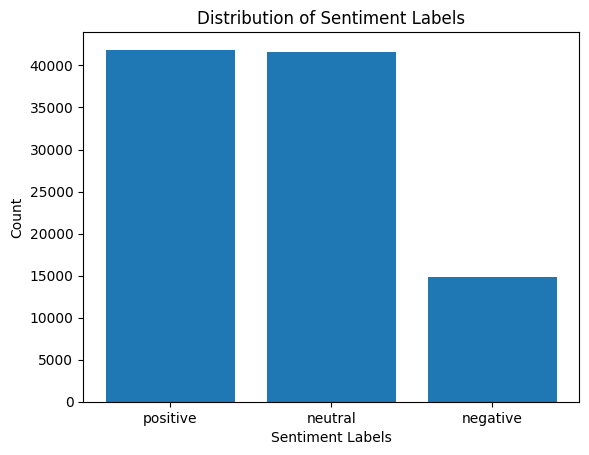

In [ ]:
sentiment_counts = merged_df_comments['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()

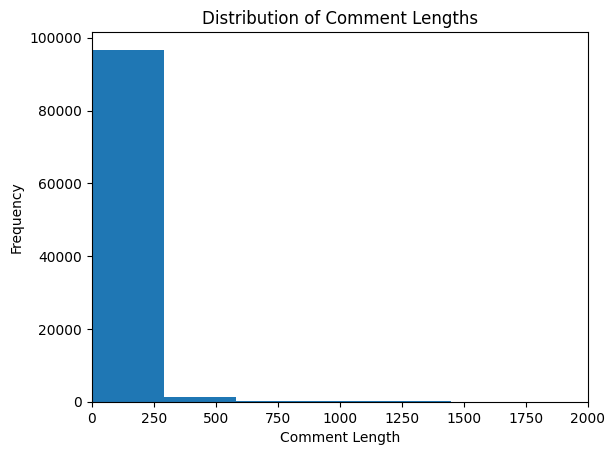

In [ ]:
#Common length analysis
comment_lengths = merged_df_comments['comment_text'].apply(len)
plt.hist(comment_lengths, bins=30)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.title('Distribution of Comment Lengths')
plt.show()

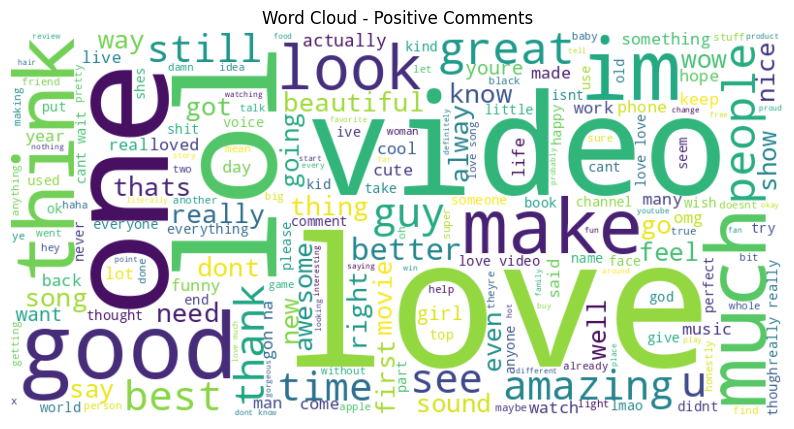

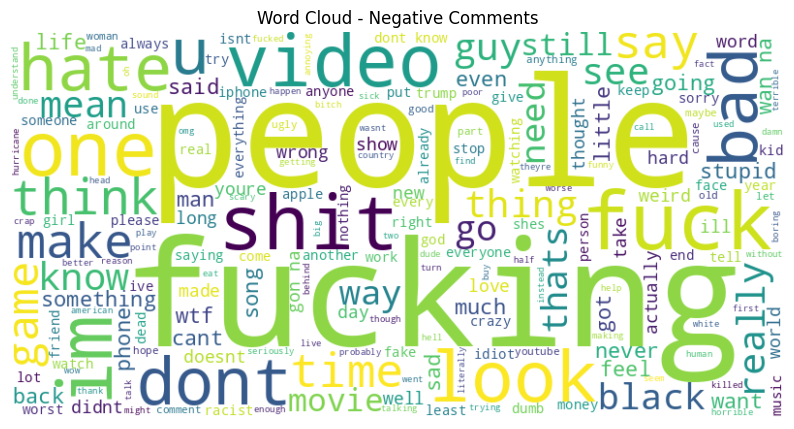

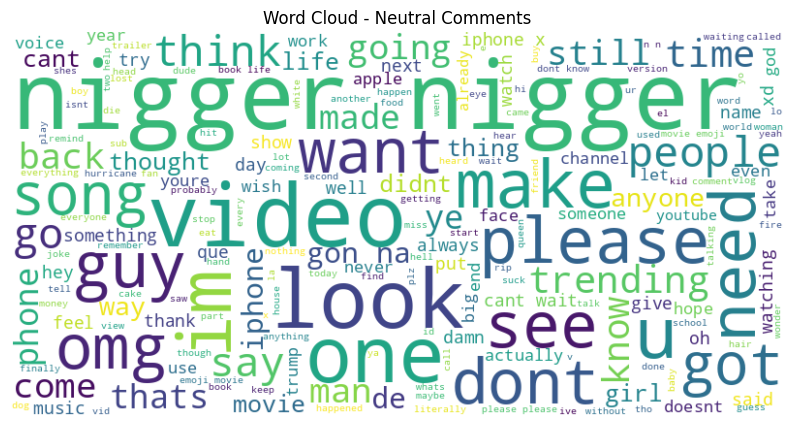

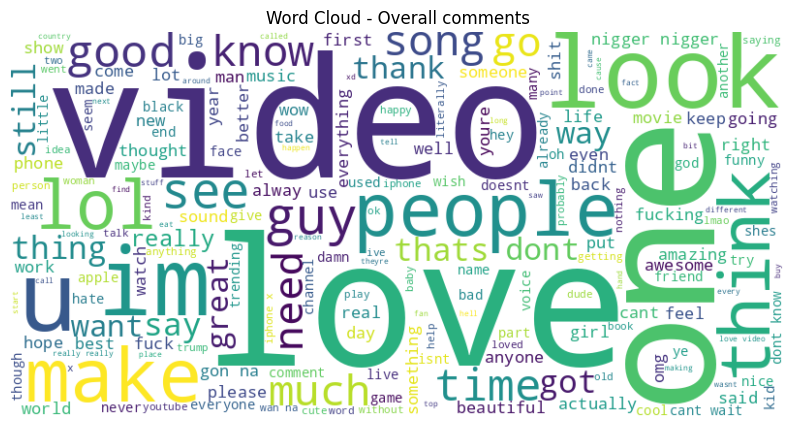

In [ ]:
from collections import Counter
from wordcloud import WordCloud

def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

overall_comments = ' '.join(merged_df_comments['comment_text'])
positive_comments = merged_df_comments[merged_df_comments['sentiment'] == 'positive']
negative_comments = merged_df_comments[merged_df_comments['sentiment'] == 'negative']
neutral_comments = merged_df_comments[merged_df_comments['sentiment'] == 'neutral']

positive_text = ' '.join(positive_comments['comment_text'])
negative_text = ' '.join(negative_comments['comment_text'])
neutral_text = ' '.join(neutral_comments['comment_text'])
plot_word_cloud(positive_text, 'Word Cloud - Positive Comments')
plot_word_cloud(negative_text, 'Word Cloud - Negative Comments')
plot_word_cloud(neutral_text, 'Word Cloud - Neutral Comments')
plot_word_cloud(overall_comments, 'Word Cloud - Overall comments')

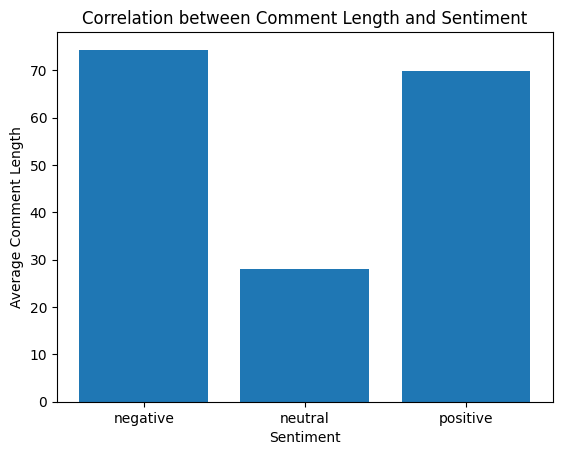

In [ ]:
merged_df_comments['comment_length'] = merged_df_comments['comment_text'].str.len()
sentiment_length = merged_df_comments.groupby('sentiment')['comment_length'].mean()
plt.bar(sentiment_length.index, sentiment_length)
plt.xlabel('Sentiment')
plt.ylabel('Average Comment Length')
plt.title('Correlation between Comment Length and Sentiment')
plt.show()

In [ ]:
# Select the relevant columns for correlation analysis
columns_of_interest = [ 'likes', 'replies']

# Subset the merged_df_comments dataframe with the selected columns
subset_df = merged_df_comments[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Display the correlation matrix
print(correlation_matrix)


            likes   replies
likes    1.000000  0.639384
replies  0.639384  1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df_comments['comment_text'], merged_df_comments['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vec, y_train)

# Prediction
y_pred = naive_bayes.predict(X_test_vec)

# Evaluation of model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Naive Bayes Accuracy:", accuracy)
print("Naive Bayes Classification Report:\n", report)

Naive Bayes Accuracy: 0.781257944780597
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.64      0.73      3009
     neutral       0.97      0.64      0.77      8289
    positive       0.68      0.97      0.80      8369

    accuracy                           0.78     19667
   macro avg       0.83      0.75      0.77     19667
weighted avg       0.83      0.78      0.78     19667



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_df_comments['comment_text'], merged_df_comments['sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Training
random_forest = RandomForestClassifier()
random_forest.fit(X_train_vec, y_train)

# Prediction
y_pred = random_forest.predict(X_test_vec)

# Evaluation of model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)
print("Random Forest Classification Report:\n", report)


Random Forest Accuracy: 0.9549499161031169
Random Forest Classification Report:
               precision    recall  f1-score   support

    negative       0.97      0.80      0.88      3009
     neutral       0.97      0.99      0.98      8289
    positive       0.94      0.98      0.96      8369

    accuracy                           0.95     19667
   macro avg       0.96      0.92      0.94     19667
weighted avg       0.96      0.95      0.95     19667

